In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

base_path=os.chdir(r"C:\Users\Rakesh\Downloads")

df=pd.read_csv("weatherAUS_data.csv")

In [2]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.dropna(subset=["RainToday","RainTomorrow"],inplace=True)

In [5]:
df.isna().sum().sort_values(ascending=False)

Sunshine         66805
Evaporation      59694
Cloud3pm         56094
Cloud9am         52625
Pressure3pm      13769
Pressure9am      13743
WindDir9am        9660
WindGustDir       9163
WindGustSpeed     9105
WindDir3pm        3670
Humidity3pm       3501
Temp3pm           2624
WindSpeed3pm      2531
Humidity9am       1517
WindSpeed9am      1055
Temp9am            656
MinTemp            468
MaxTemp            307
Date                 0
Rainfall             0
Location             0
RainToday            0
RainTomorrow         0
dtype: int64

In [6]:
px.histogram(df,x="Location",title="Location vs Rainy day",color="RainToday")

In [7]:
df["RainStatus"] = df["RainToday"].astype(str) + "_" + df["RainTomorrow"].astype(str)

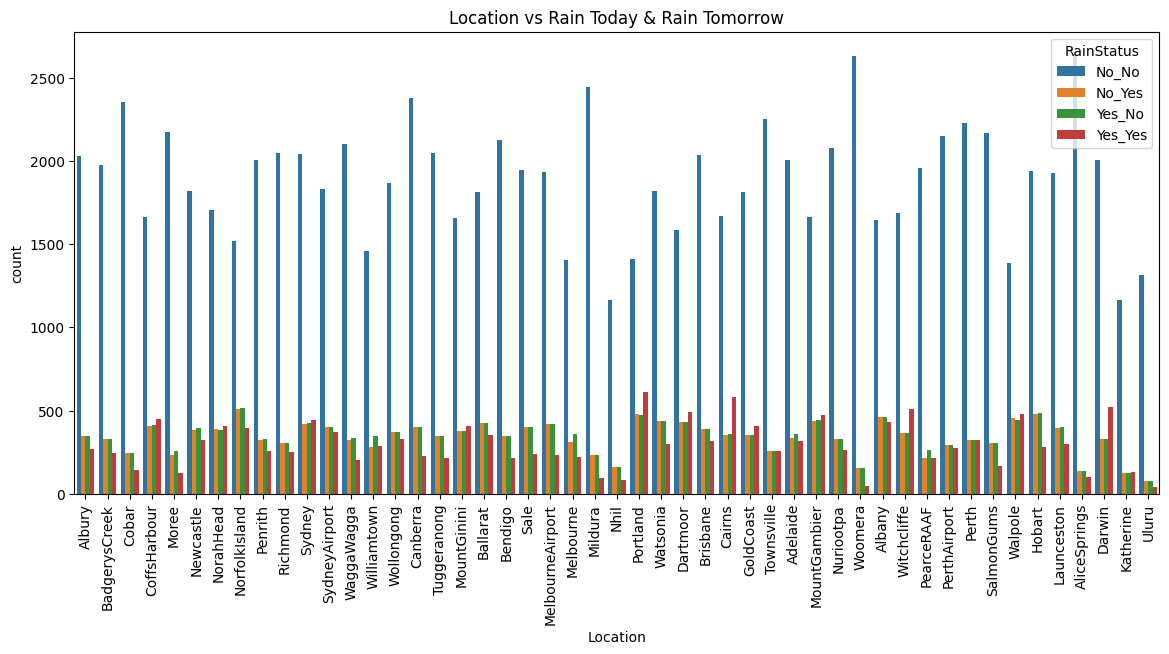

In [8]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="Location", hue="RainStatus")

plt.title("Location vs Rain Today & Rain Tomorrow")
plt.xticks(rotation=90)
plt.show()

In [9]:
px.histogram(
    df,
    x="Location",
    color="RainStatus",
    title="Location vs Rain Today & Tomorrow",
    barmode="group"
)

In [10]:
df.drop(columns="RainStatus",axis=1,inplace=True)

In [11]:
px.histogram(data_frame=df,x="Temp3pm",title="Location vs temp at 9pm",color="RainTomorrow")

In [12]:
px.scatter(df.sample(5000),x="MinTemp",y="MaxTemp",color="RainToday")

In [13]:
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

In [14]:
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [15]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(84471, 23)
(28158, 23)
(28158, 23)


<Axes: title={'center': 'No of years'}, xlabel='Date', ylabel='count'>

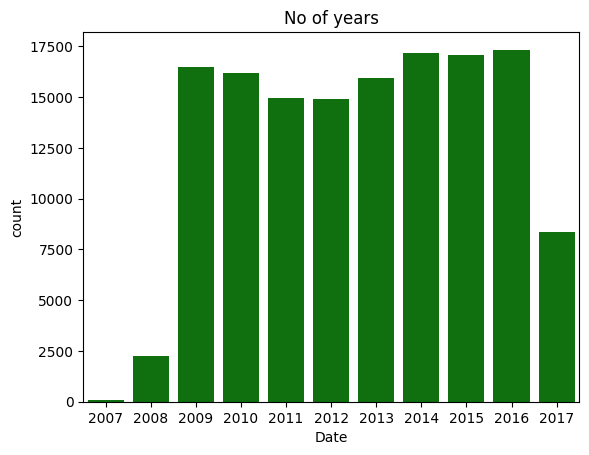

In [16]:
plt.title("No of years")
sns.countplot(x=pd.to_datetime(df.Date).dt.year,color="g")

In [17]:
year=pd.to_datetime(df.Date).dt.year

train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [18]:
input_col=list(train_df.columns)[1:-1]
target_col="RainTomorrow"

In [19]:
train_input=train_df[input_col].copy()
train_targets=train_df[target_col].copy()

In [20]:
test_input=test_df[input_col].copy()
test_targets=test_df[target_col].copy()

In [21]:
val_input=val_df[input_col].copy()
val_targets=val_df[target_col].copy()

In [22]:
numeric_col=train_input.select_dtypes(include=[np.number]).columns
categorical_col=train_input.select_dtypes(include="object").columns

In [23]:
train_input[numeric_col].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [24]:
train_input[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [25]:
def fill_missing_by_location(df, median_cols=None):
    if isinstance(median_cols, (pd.Index, pd.Series)):
        median_cols = list(median_cols)

    if median_cols is not None:
        for col in median_cols:
            df[col] = df.groupby("Location")[col].transform(
                lambda x: x.fillna(x.median())
            )
    return df


In [26]:
fill_missing_by_location(train_df, numeric_col)
fill_missing_by_location(val_df, numeric_col)
fill_missing_by_location(test_df, numeric_col)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       7.0       5.5      9.4   
145455         24.0       1024.6       1020.3       7.0       5.5     10.1   
145456         21.0       1023.5       1019.1       7.0       5.5     10.9   
145457         24.0       1021.0       1016.8       7.0       5.5     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [27]:
train_df.isna().sum().sort_values(ascending=False)

Sunshine         34661
Evaporation      29505
Cloud9am         22958
Cloud3pm         22958
Pressure9am       8053
Pressure3pm       8053
WindDir9am        7019
WindGustDir       6868
WindGustSpeed     4184
WindDir3pm        1952
MaxTemp              0
Date                 0
Rainfall             0
Location             0
MinTemp              0
Humidity3pm          0
Humidity9am          0
WindSpeed3pm         0
WindSpeed9am         0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [29]:
imputer=SimpleImputer(strategy='median')
imputer.fit(df[numeric_col])

SimpleImputer(strategy='median')

In [30]:
train_input[numeric_col]=imputer.transform(train_input[numeric_col])
test_input[numeric_col]=imputer.transform(test_input[numeric_col])
val_input[numeric_col]=imputer.transform(val_input[numeric_col])

In [32]:
scale=MinMaxScaler()
scale.fit(df[numeric_col])

MinMaxScaler()

In [33]:
train_input[numeric_col]=scale.transform(train_input[numeric_col])
test_input[numeric_col]=scale.transform(test_input[numeric_col])
val_input[numeric_col]=scale.transform(val_input[numeric_col])

In [35]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")

In [36]:
encoder.fit(df[categorical_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [37]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [38]:
encoder_col=encoder.get_feature_names_out(categorical_col)
encoder_col

array(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Location_Sale', 'Location_SalmonGums', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville',
       'Location_Tuggeranong', 

In [39]:
train_input[encoder_col]=encoder.transform(train_input[categorical_col])
test_input[encoder_col]=encoder.transform(test_input[categorical_col])
val_input[encoder_col]=encoder.transform(val_input[categorical_col])

In [40]:
train_input.drop(columns=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],axis=1,inplace=True)
test_input.drop(columns=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],axis=1,inplace=True)
val_input.drop(columns=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],axis=1,inplace=True)

In [41]:
train_input.shape

(97988, 118)

In [42]:
train_input.isna().sum().sort_values(ascending=False)

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_WNW    0
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
Length: 118, dtype: int64

In [43]:
train_input.to_parquet("train_input.parquet")
test_input.to_parquet("test_input.parquet")
val_input.to_parquet("val_input.parquet")

In [44]:
pd.DataFrame(train_targets).to_parquet("train_targets.parquet")
pd.DataFrame(test_targets).to_parquet("test_targets.parquet")
pd.DataFrame(val_targets).to_parquet("val_targets.parquet")


In [45]:
model=LogisticRegression(solver="liblinear")

In [46]:
encoder_col

array(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Location_Sale', 'Location_SalmonGums', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville',
       'Location_Tuggeranong', 

In [47]:
model.fit(train_input,train_targets)

LogisticRegression(solver='liblinear')

In [48]:
model.coef_.tolist()

[[0.8966895740411416,
  -2.7878911478309547,
  3.1745685177085567,
  1.0216735180621548,
  -1.6644103439642792,
  6.774397621488408,
  -0.9415698480128362,
  -1.440917827588922,
  0.337726855002892,
  6.0003680859821955,
  5.494844819494728,
  -9.204734533232896,
  -0.16231140792830417,
  1.2701712656648898,
  0.49187608585220893,
  1.8891932638045006,
  0.5442364337853121,
  -0.5801509964323552,
  0.5367054182875621,
  -0.009589764626989494,
  0.3667008440784154,
  -0.2889415800333968,
  0.25362661981580015,
  0.42274038834000466,
  -0.033613603312594956,
  0.031342394653110624,
  0.31010475407215443,
  -0.020083037726572193,
  -0.12624591226104276,
  -0.5019541544686255,
  -0.11709587027579008,
  -0.6288610405861729,
  -0.7164781956486082,
  -0.2345565053555877,
  -0.35652742282404387,
  -0.5883152187924293,
  0.06402600113748212,
  -0.0022188194502541906,
  0.04478553633309468,
  -0.8946752256417791,
  -0.38135677159011966,
  0.024095829595115238,
  -0.44270738724871656,
  -0.486678

In [49]:
weight=pd.DataFrame({'feature':train_input.columns,'weight':model.coef_.tolist()[0]})

In [50]:
weight

feature    weight
0           MinTemp  0.896690
1           MaxTemp -2.787891
2          Rainfall  3.174569
3       Evaporation  1.021674
4          Sunshine -1.664410
..              ...       ...
113  WindDir3pm_WNW -0.030547
114  WindDir3pm_WSW -0.274783
115  WindDir3pm_nan  0.067178
116    RainToday_No -1.467613
117   RainToday_Yes -0.969046

[118 rows x 2 columns]

<Axes: xlabel='weight', ylabel='feature'>

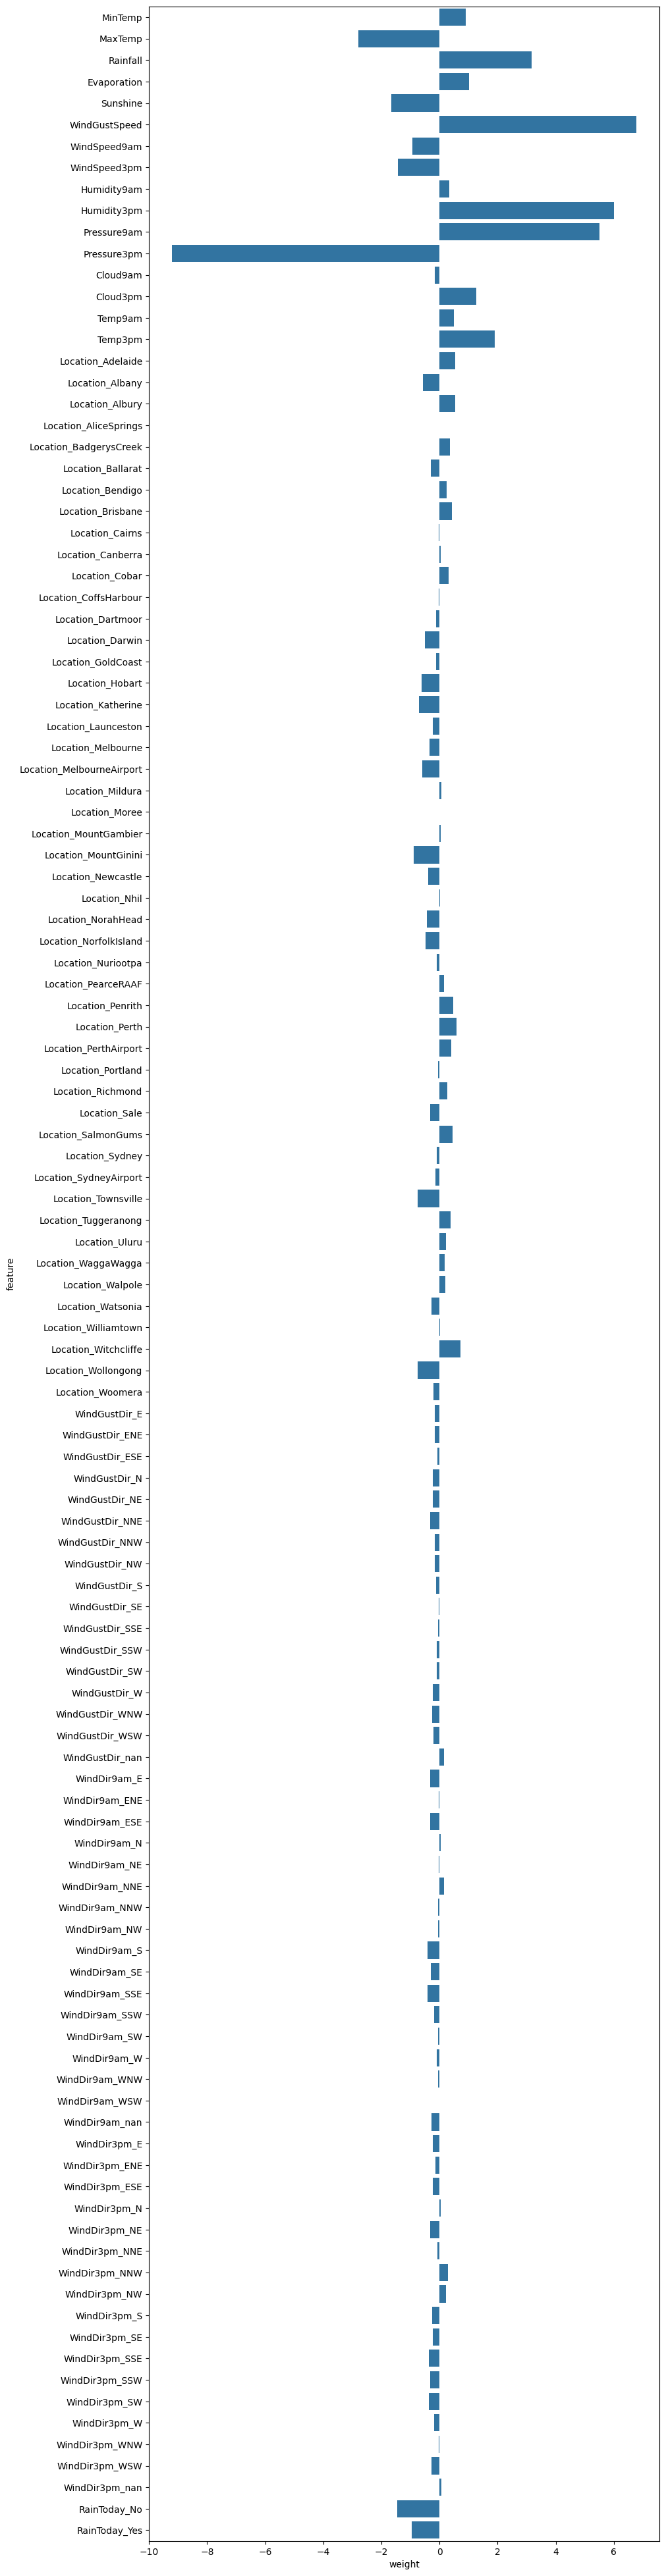

In [51]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight,x="weight",y="feature")

In [52]:
train_preds=model.predict(train_input)

In [53]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(97988,), dtype=object)

In [54]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [55]:
train_prob=model.predict_proba(train_input)

In [56]:
train_prob

array([[0.94156702, 0.05843298],
       [0.93917853, 0.06082147],
       [0.96223396, 0.03776604],
       ...,
       [0.98748198, 0.01251802],
       [0.98337421, 0.01662579],
       [0.87416588, 0.12583412]], shape=(97988, 2))

In [57]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,confusion_matrix

In [58]:
print("Accuracy ",accuracy_score(train_targets,train_preds))

Accuracy  0.8518390006939626


In [59]:
print(classification_report(train_targets,train_preds))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     76190
         Yes       0.73      0.52      0.61     21798

    accuracy                           0.85     97988
   macro avg       0.80      0.73      0.76     97988
weighted avg       0.84      0.85      0.84     97988



In [60]:
print(confusion_matrix(train_targets,train_preds,normalize='true'))

[[0.94606904 0.05393096]
 [0.47752087 0.52247913]]


In [61]:
def predict(inputs,targets):
    preds=model.predict(inputs)
    accuracy=accuracy_score(targets,preds)
    print(f"Accurancy Score:",accuracy*100)

    cf=confusion_matrix(targets,preds,normalize='true')
    sns.heatmap(cf,annot=True)
    plt.xlabel("Pred")
    plt.ylabel("Target")
    plt.title("confusion_matrix")

    return preds


Accurancy Score: 85.18390006939626


array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(97988,), dtype=object)

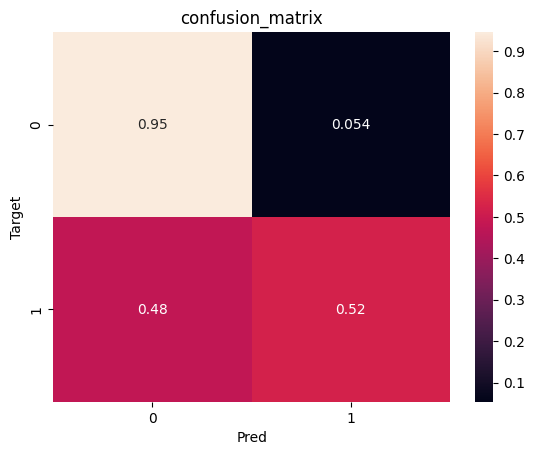

In [62]:
predict(train_input,train_targets)

Accurancy Score: 85.35315114986248


array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(17089,), dtype=object)

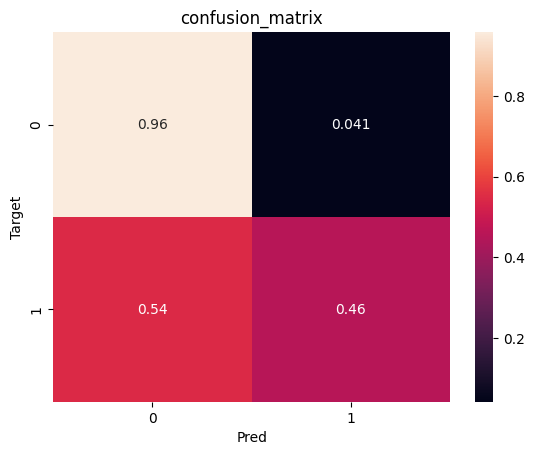

In [63]:
predict(val_input,val_targets)

In [65]:
import joblib

In [67]:
target_col

'RainTomorrow'

In [68]:
rain_model={
    'model':model,
    'imputer':imputer,
    'scaler':scale,
    'encoder':encoder,
    'input_cols':input_col,
    'target_col':target_col,
    'numeric_col':numeric_col,
    'categorical_col':categorical_col,
    'encoder_col':encoder_col
}

In [69]:
joblib.dump(rain_model,'rain_model.joblib')

['rain_model.joblib']

In [70]:
load=joblib.load("rain_model.joblib")

In [72]:
test_pred2=load['model'].predict(test_input)
accuracy_score(test_targets,test_pred2)

0.8414235705950992